In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Data/crop_yield.csv')
print(df.shape)
df.head()

(1000000, 10)


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [3]:
# Check for missing values
df.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [4]:
# Check for duplicates
df.duplicated().sum()

0

In [5]:
# Check for unique values
df.nunique()

Region                          4
Soil_Type                       6
Crop                            6
Rainfall_mm               1000000
Temperature_Celsius       1000000
Fertilizer_Used                 2
Irrigation_Used                 2
Weather_Condition               3
Days_to_Harvest                90
Yield_tons_per_hectare    1000000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [7]:
# Check for outliers
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [8]:
df.select_dtypes(exclude=['number']).describe()

,Region,Soil_Type,Crop,Fertilizer_Used,Irrigation_Used,Weather_Condition
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,4,6,6,2,2,3
top,North,Sandy,Maize,False,False,Sunny
freq,250173,167119,166824,500060,500509,333790


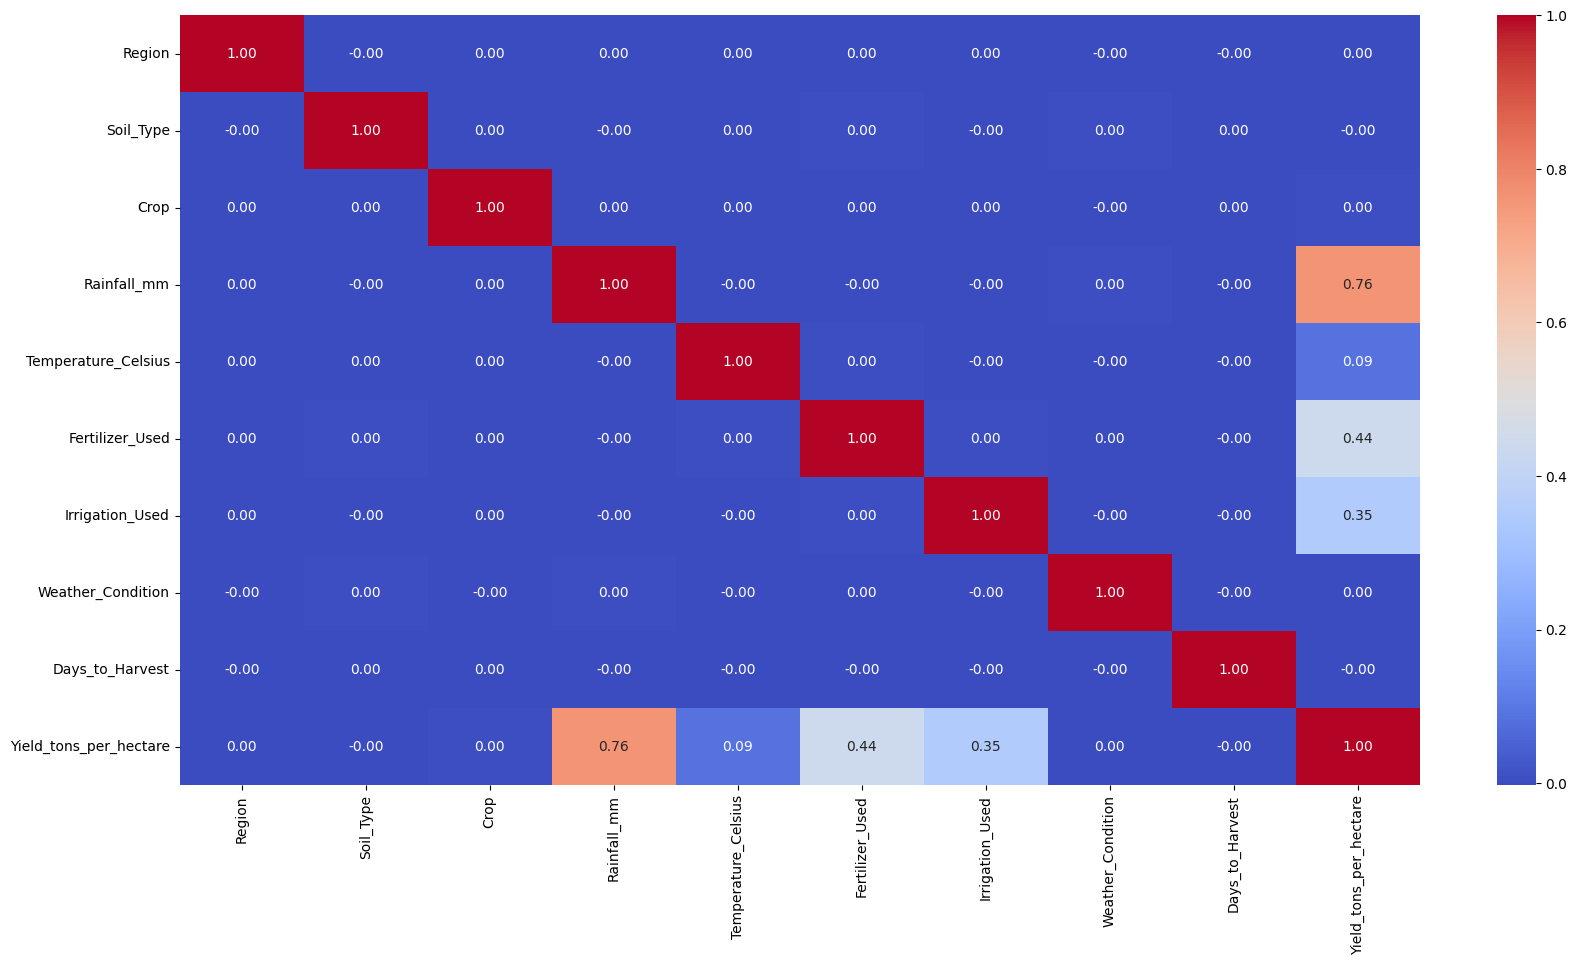

In [17]:
temp = df.copy()
for i in temp.columns:
    if temp[i].dtype == 'object':
        temp[i] = temp[i].astype('category')
        temp[i] = temp[i].cat.codes

plt.figure(figsize=(20, 10))
corr = temp.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<Figure size 2000x1000 with 0 Axes>

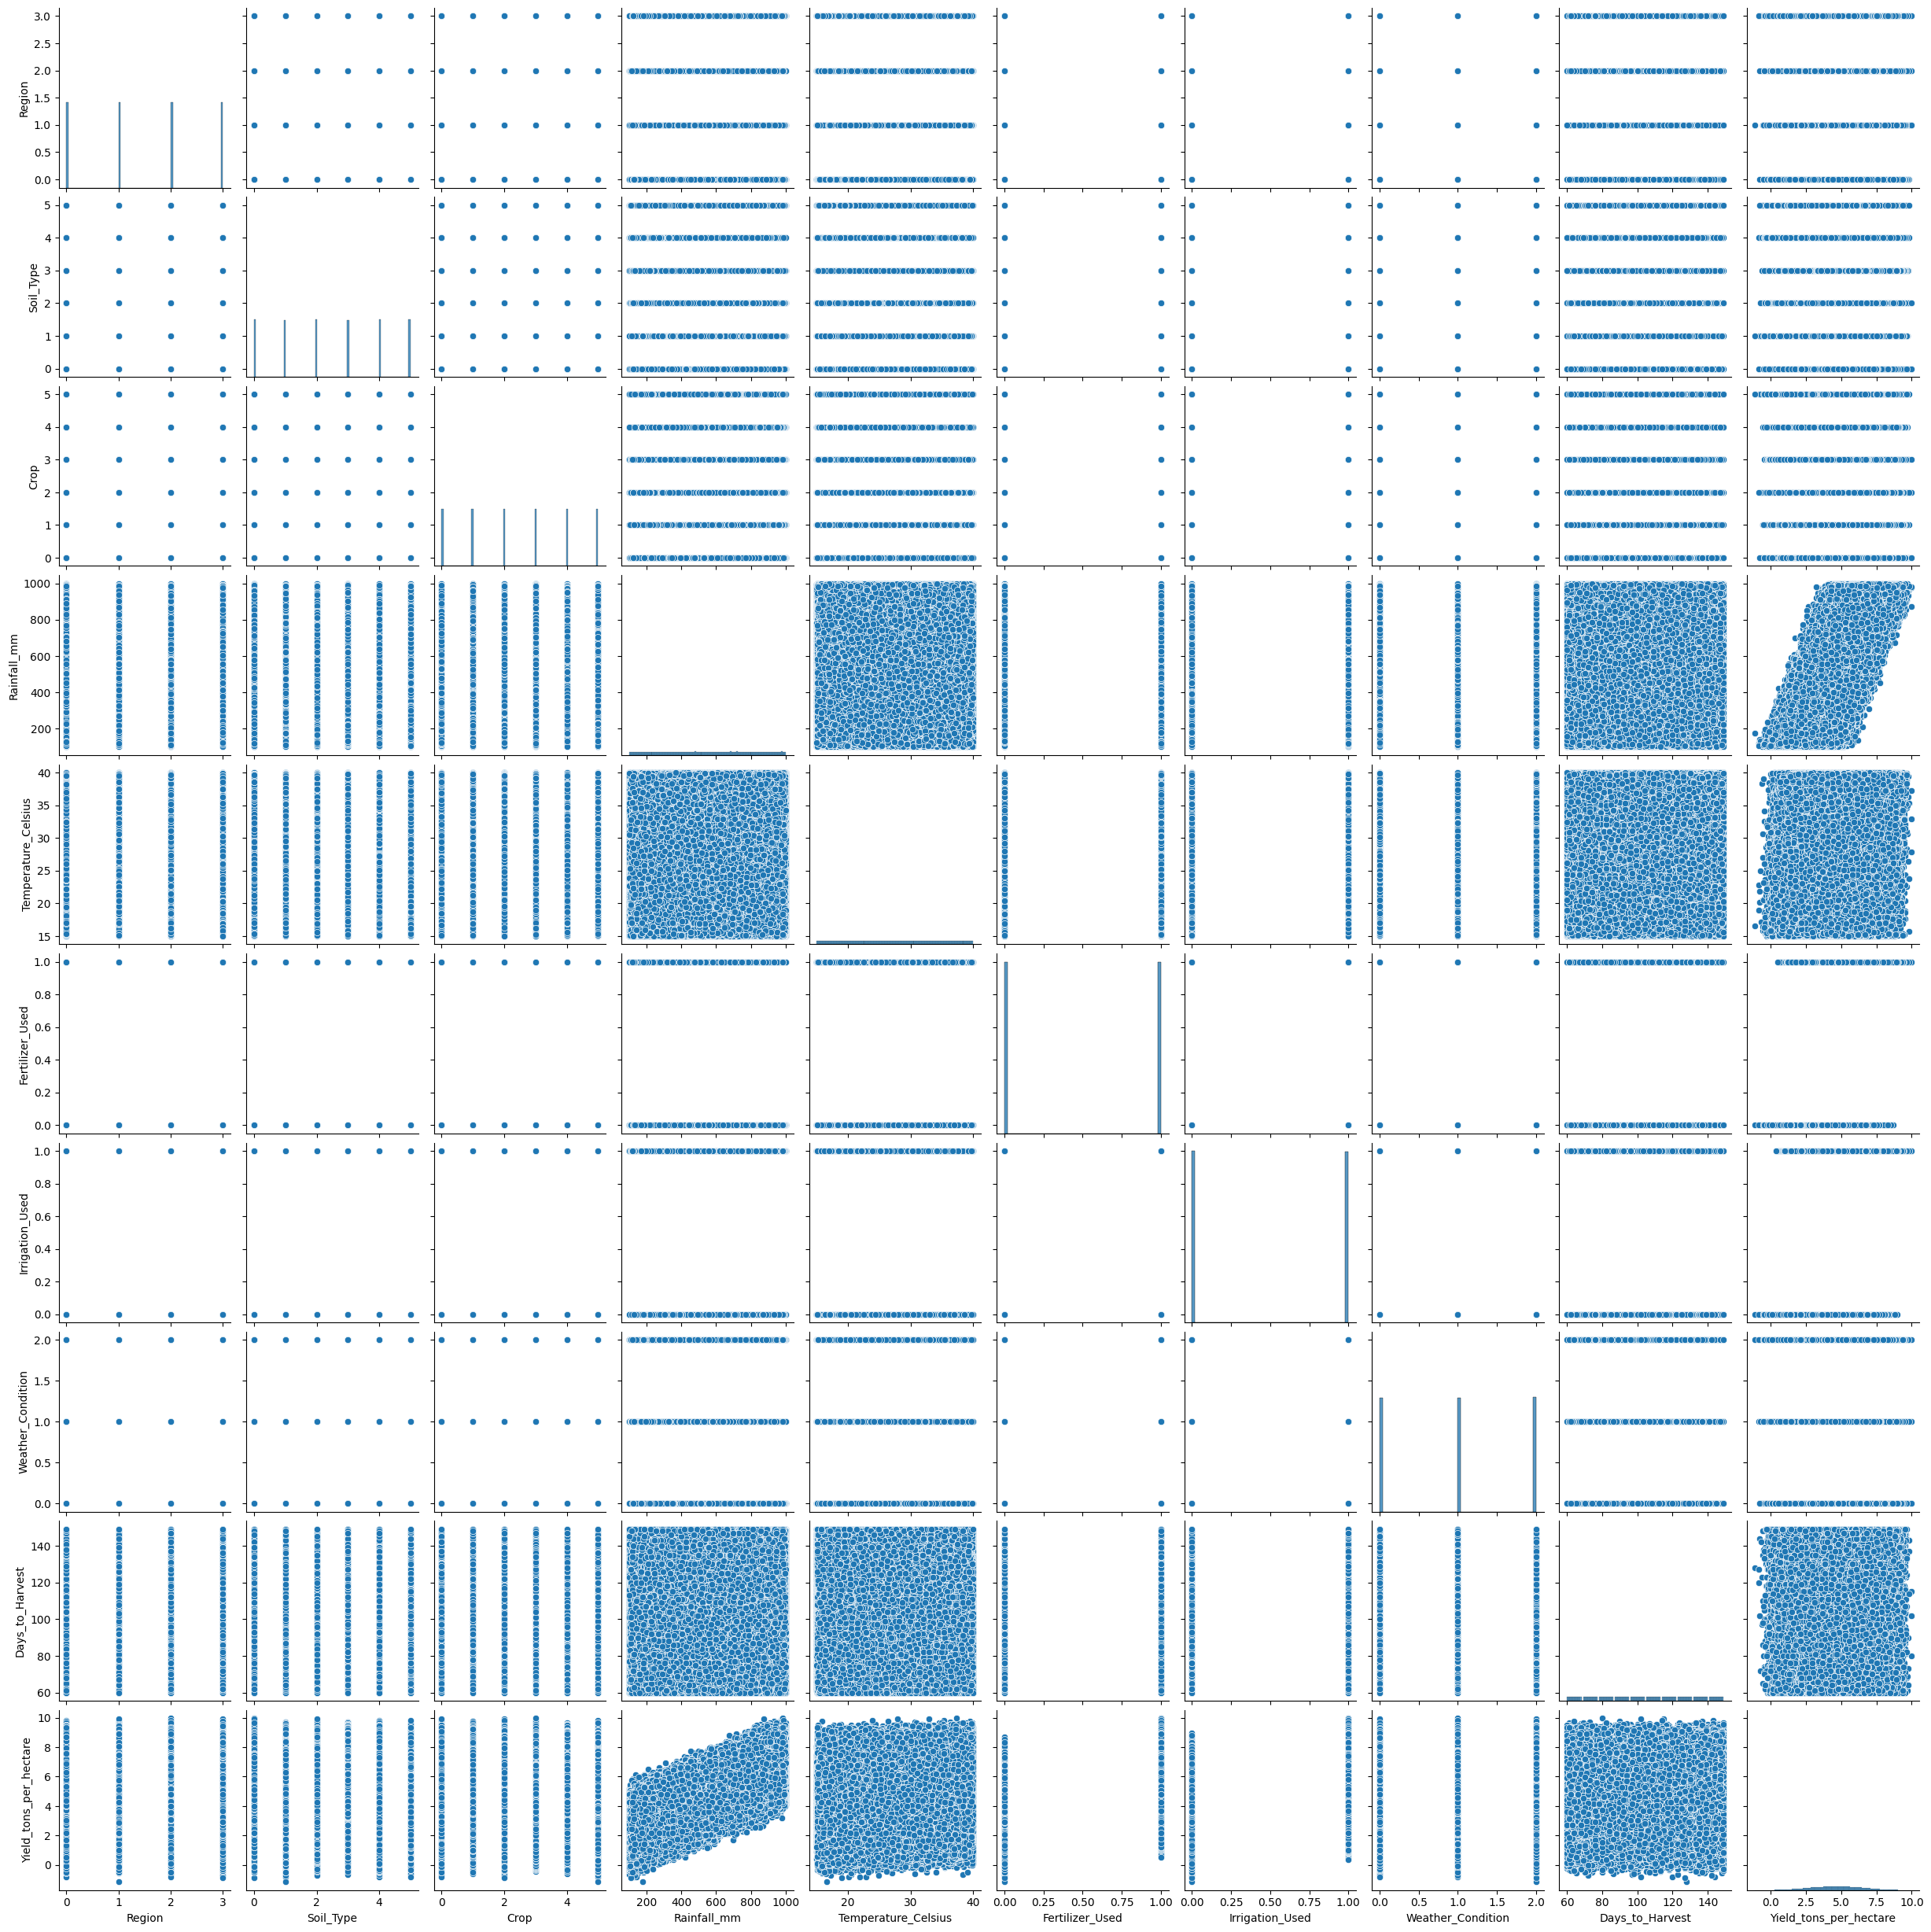

In [18]:
plt.figure(figsize=(20, 10))
sns.pairplot(temp)
plt.show()


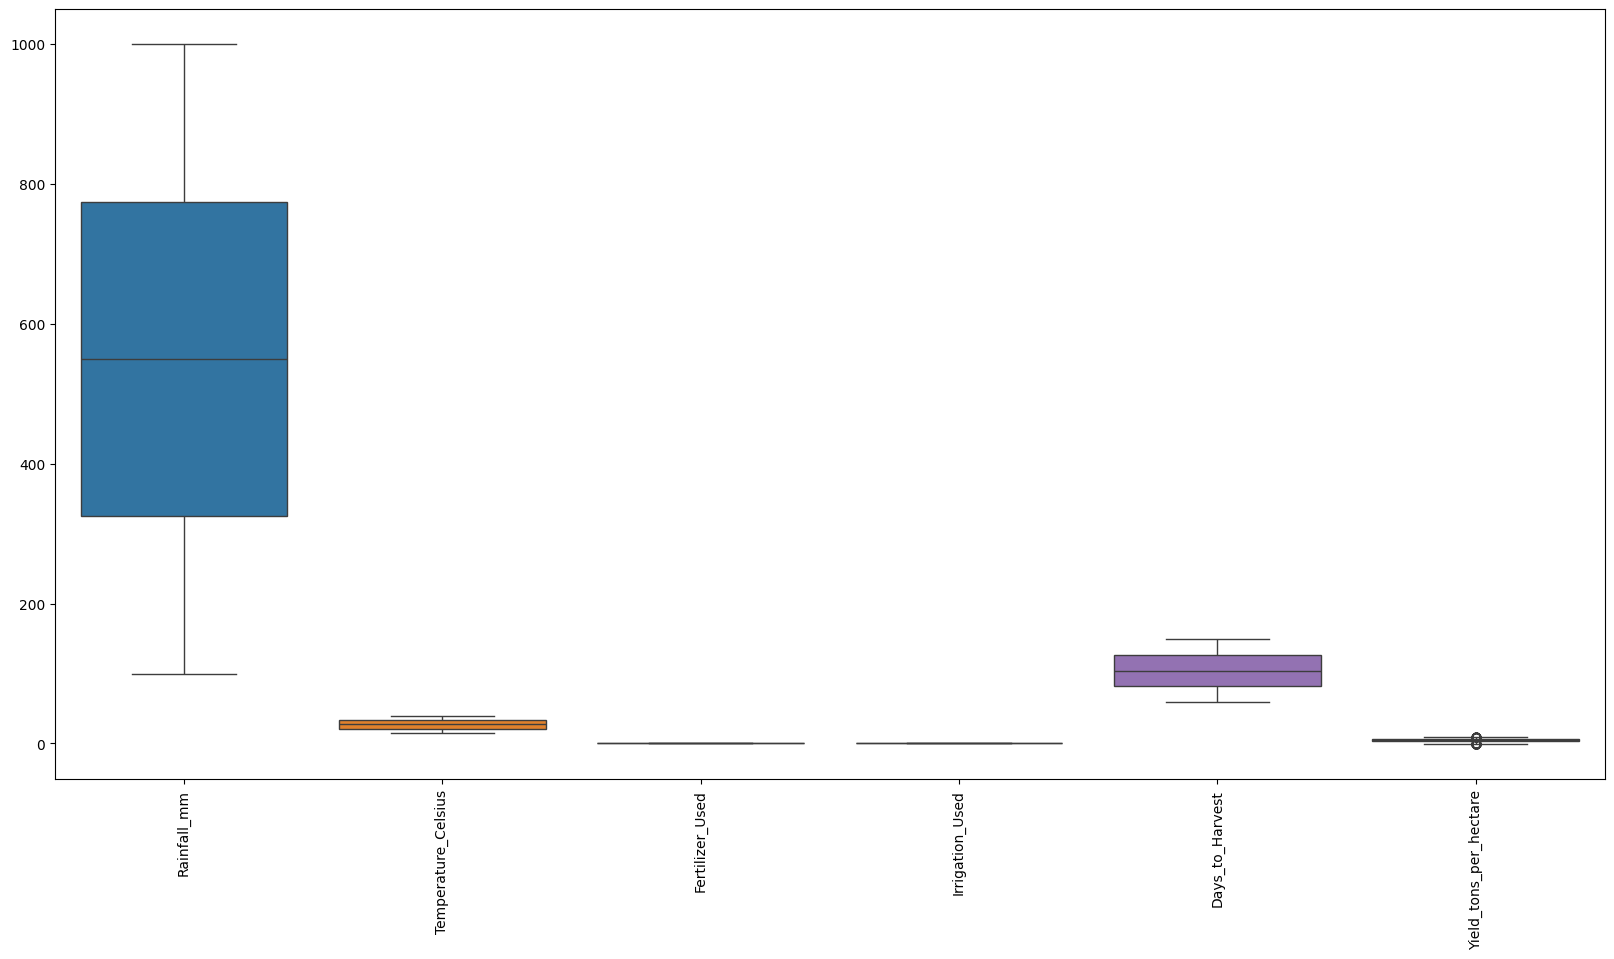

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

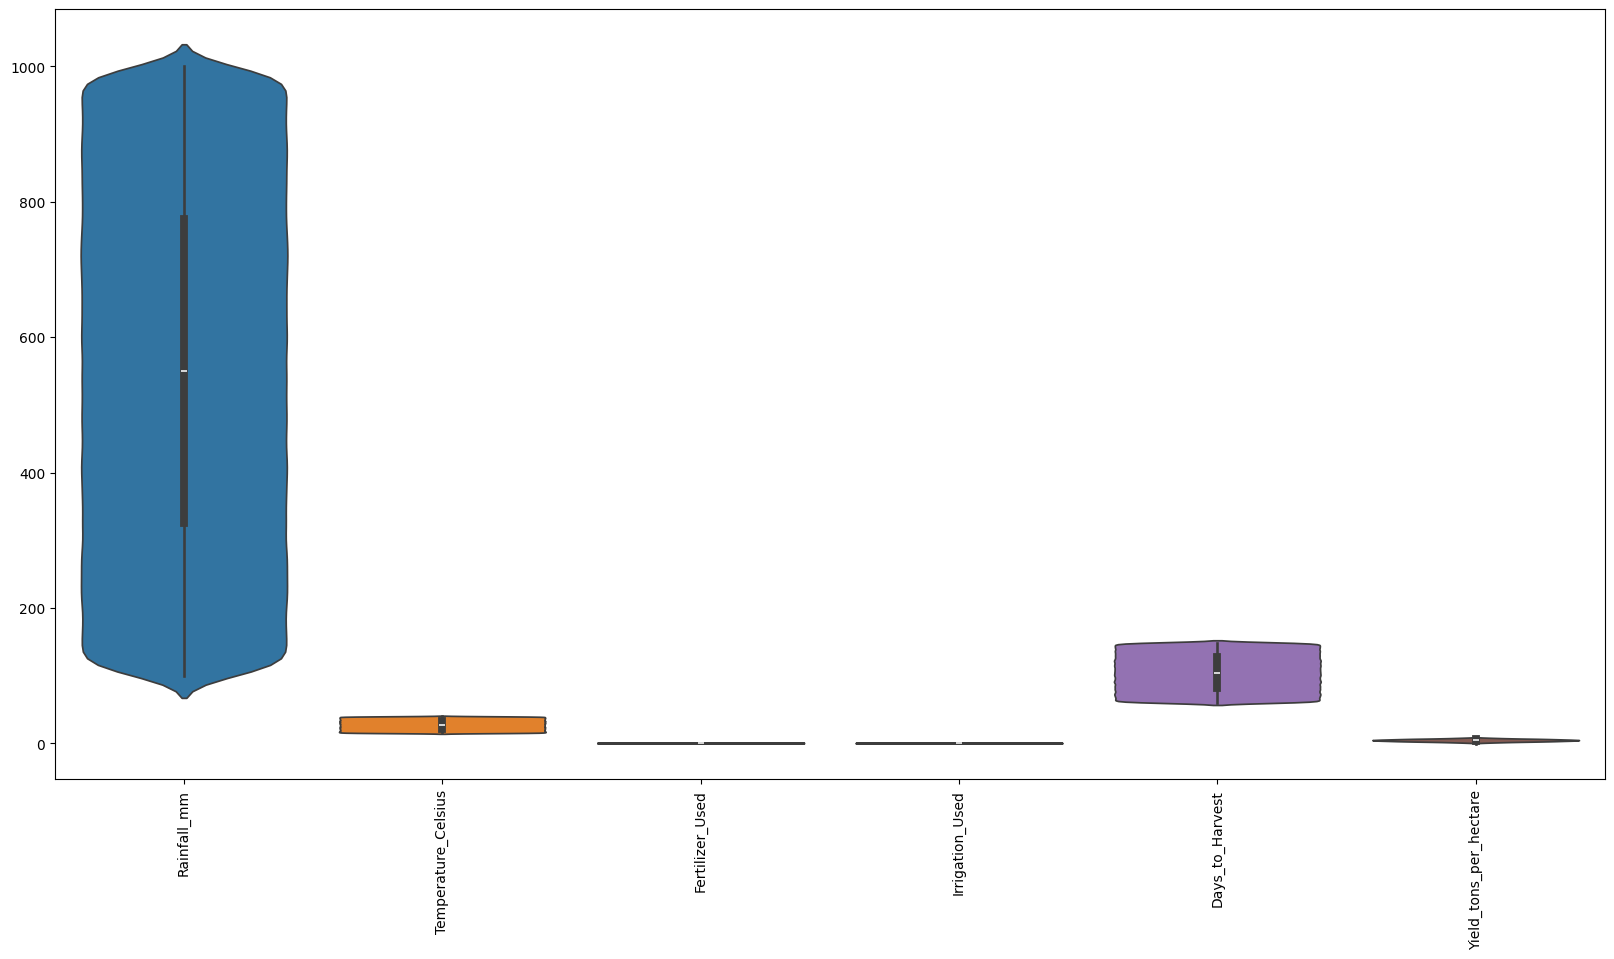

In [20]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Crop'>

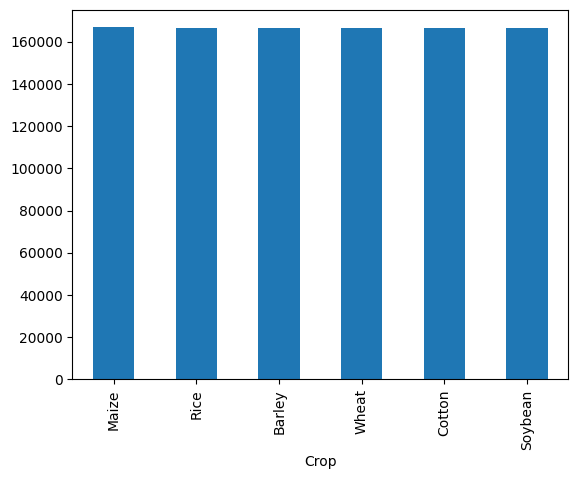

In [21]:
df['Crop'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

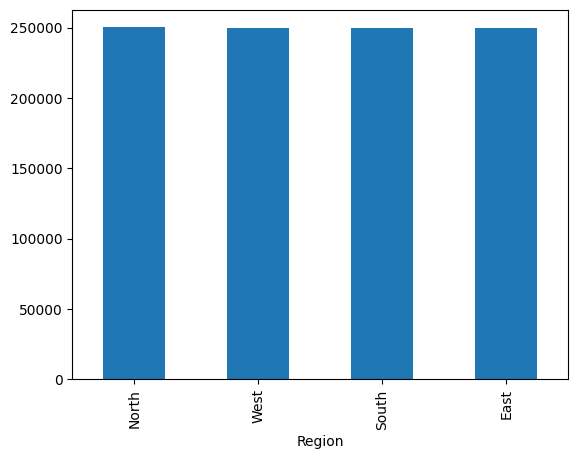

In [22]:
df['Region'].value_counts().plot(kind='bar')

<Axes: xlabel='Soil_Type'>

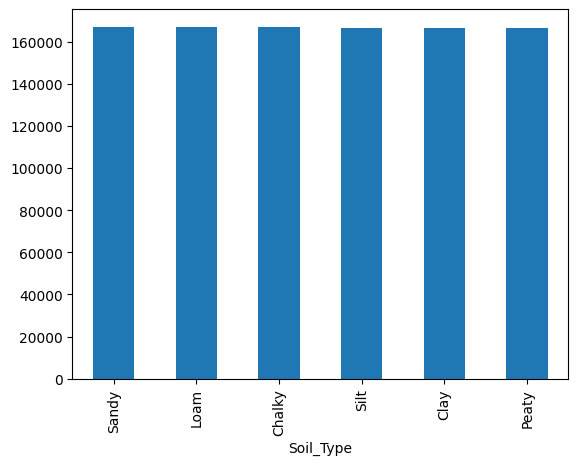

In [23]:
df['Soil_Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Weather_Condition'>

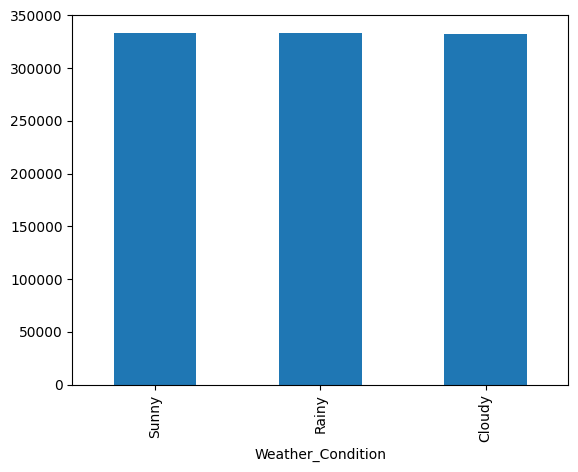

In [24]:
df['Weather_Condition'].value_counts().plot(kind='bar')

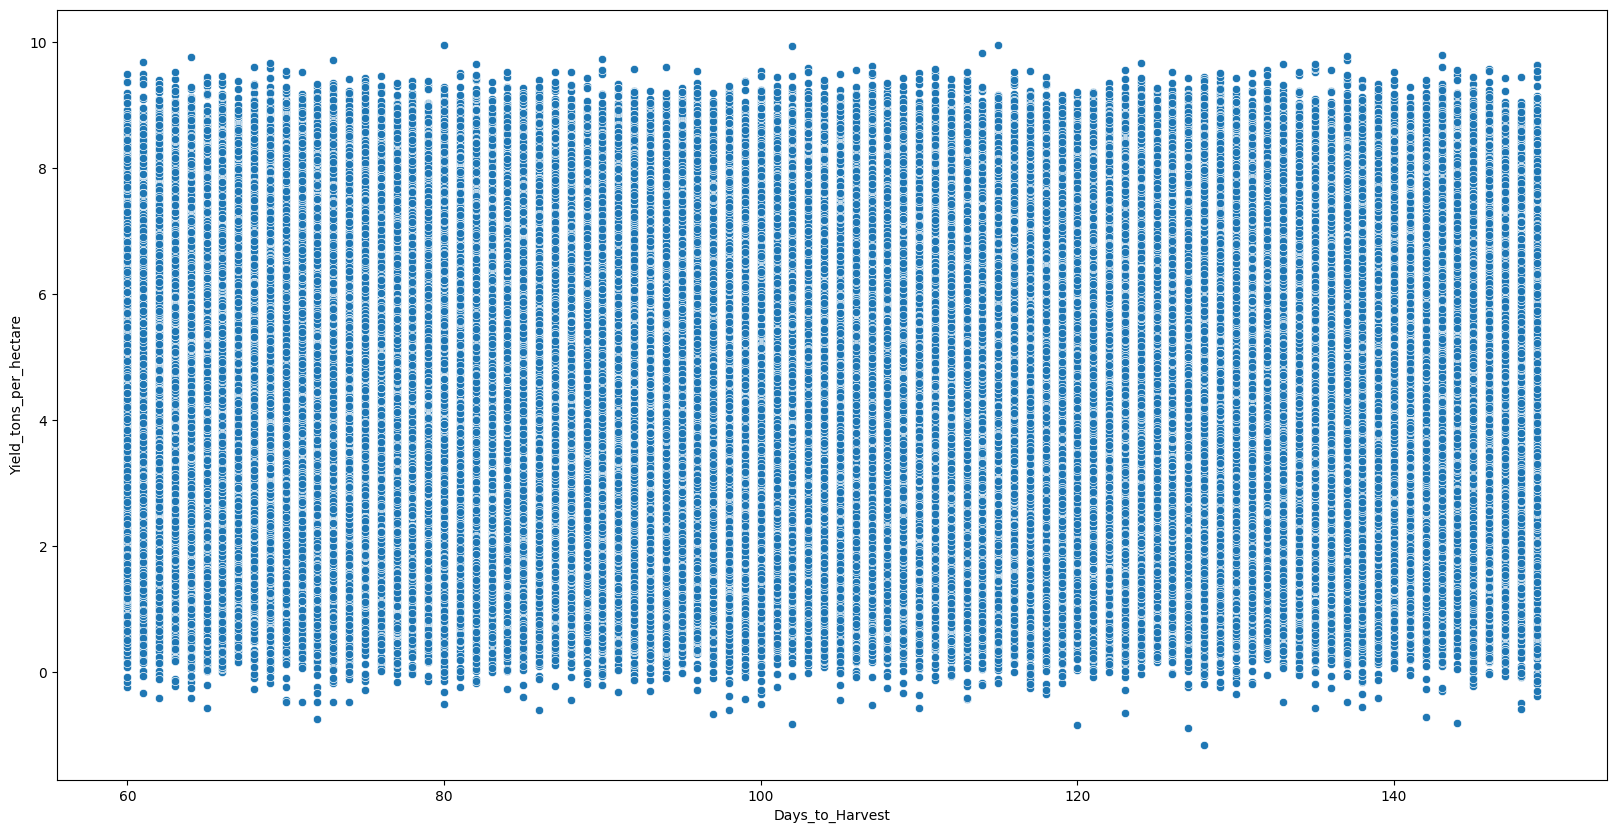

In [26]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df)
plt.show()